In [83]:
#https://drive.google.com/file/d/1TIBaUS4buc1iedXf_KiNkARG6uM5Nc4F/view?usp=sharing
#this is the dataset link

In [84]:
#Import libraries

import numpy as np 
import pandas as pd 
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [85]:
#Load the data
dataset = pd.read_csv('SMSSpamCollection.txt', error_bad_lines=False, sep = '\t', names=["label","sms"])
dataset

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [86]:
#map ham as 0 and spam as 1
dataset.loc[:,'label']=dataset.label.map({'ham':0, 'spam':1})
dataset

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [87]:
#Print the shape (Get the number of rows and cols)
dataset.shape

(5572, 2)

In [88]:
#Get the column names
dataset.columns

Index(['label', 'sms'], dtype='object')

In [89]:
#get null value count
dataset.isnull().sum()

label    0
sms      0
dtype: int64

In [90]:
#remove punctuations and convert all letters to lowercase
import string
punctuation = string.punctuation

def cleaningData(sms):
    removePunctuation = "".join([word.lower() for word in sms if word not in punctuation])
    return removePunctuation

dataset['sms'] = dataset['sms'].apply(lambda x: cleaningData(x))
dataset.head()

,label,sms
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [91]:
#remove stopwords and do lemmatization and stemming

stopWord = nltk.corpus.stopwords.words('english')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def featureSelection(tokens):
    reducedTerms = []
    for word in tokens:
        word = lemmatizer.lemmatize(word)
        word = stemmer.stem(word)
        if word not in stopWord:
            reducedTerms.append(word)
    return reducedTerms
dataset['tokens'] = dataset['sms'].str.split().apply(lambda x: featureSelection(x))
dataset.head()

,label,sms,tokens
0,0,go until jurong point crazy available only in ...,"[go, jurong, point, crazi, avail, onli, bugi, ..."
1,0,ok lar joking wif u oni,"[ok, lar, joke, wif, u, oni]"
2,1,free entry in 2 a wkly comp to win fa cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,u dun say so early hor u c already then say,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, go, usf, life, around, though]"


In [92]:
#Join tokens and get final text
dataset['Final_text'] = dataset.apply(lambda x:' '.join([word for word in x['tokens'] if len(word)>1]),axis=1)
dataset.head()

,label,sms,tokens,Final_text
0,0,go until jurong point crazy available only in ...,"[go, jurong, point, crazi, avail, onli, bugi, ...",go jurong point crazi avail onli bugi great wo...
1,0,ok lar joking wif u oni,"[ok, lar, joke, wif, u, oni]",ok lar joke wif oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri wkli comp win fa cup final tkt 21st...
3,0,u dun say so early hor u c already then say,"[u, dun, say, earli, hor, u, c, alreadi, say]",dun say earli hor alreadi say
4,0,nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though


In [93]:
#Vectorize the tokens and convert into tf-idf weights
from sklearn.feature_extraction.text import TfidfVectorizer 
vector = TfidfVectorizer ()
vectorized_out = vector.fit_transform(dataset['Final_text'])
tfIdf_tokens = vector.get_feature_names()

In [94]:
#convert vector to data frame
tfIdf_vector_df = pd.DataFrame(data = vectorized_out.toarray(),columns = tfIdf_tokens)
tfIdf_vector_df

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
# Separate the datasets as Train and Test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectorized_out, dataset['label'],test_size=0.25, random_state=1)


print('Number of rows in the total set: {}'.format(dataset.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))


Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [96]:
#IT18220520
#N.G.S.D. Nanayakkara
#Model: Naive bayes

In [97]:
#create naive bayes model and fit data to model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train,y_train)

MultinomialNB()

In [98]:
#predict the value using test data
predictions = nb_classifier.predict(X_test)

In [99]:
#create confution metrix
conMetrix = confusion_matrix(y_test, predictions)
print(conMetrix)

[[1208    0]
 [  56  129]]


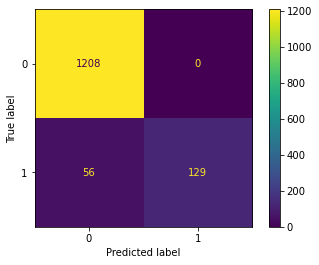

In [100]:
plot_confusion_matrix(nb_classifier, X_test, y_test)
plt.show()

In [101]:
#check accuracy and perfomance of model 
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9597989949748744
Precision score: 1.0
Recall score: 0.6972972972972973
F1 score: 0.821656050955414


In [102]:
#For naive bayes 
#56 messages that were classified incorrectly in naive bayes model
#Make the algorithm sensitive to letter case and check accuracy
#Check accuracy without removing stop words
#Increase the size of dataset


In [103]:
#IT18215984
#E.A.S.H Edirisinghe
#Model: KNN Classifier

In [104]:
#calculate k value according to error
error=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
  

In [105]:
print(error)

[0.05671213208901651, 0.08686288585786073, 0.08686288585786073, 0.09619526202440776, 0.09619526202440776, 0.10839913854989232, 0.10839913854989232, 0.12132089016511127, 0.12132089016511127, 0.12347451543431442, 0.12347451543431442, 0.1299353912419239, 0.1299353912419239, 0.13137114142139267, 0.0882986360373295, 0.09117013639626705, 0.07753050969131371, 0.08183776022972003, 0.06891600861450108, 0.07465900933237617, 0.06963388370423547, 0.07106963388370424, 0.0674802584350323, 0.07035175879396985, 0.0674802584350323, 0.06891600861450108, 0.06532663316582915, 0.0674802584350323, 0.06460875807609476, 0.06676238334529792, 0.06389088298636038, 0.06389088298636038, 0.0624551328068916, 0.06389088298636038, 0.0624551328068916, 0.06317300789662599, 0.061019382627422826, 0.0624551328068916, 0.05958363244795405]


Text(0, 0.5, 'Mean Error')

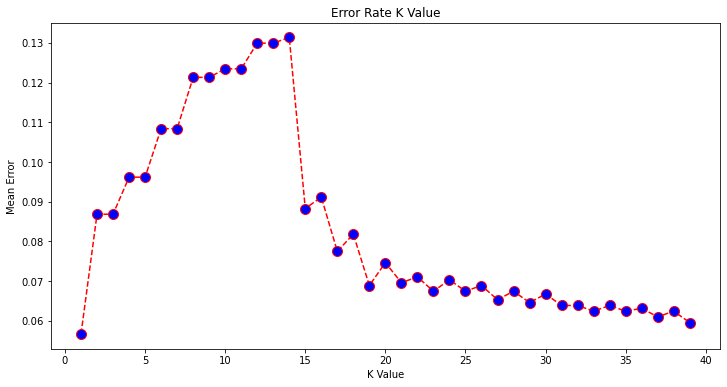

In [106]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [107]:
# Create KNN classifier
knnClassifier = KNeighborsClassifier(n_neighbors = 15, p=2, metric='euclidean' )
# Fit the classifier to the data
knnClassifier.fit(X_train,y_train)
Prediction_y = knnClassifier.predict(X_test)

In [115]:
#create confution metrix
conMetrix = confusion_matrix(y_test, Prediction_y)
print(conMetrix)

[[1208    0]
 [ 123   62]]


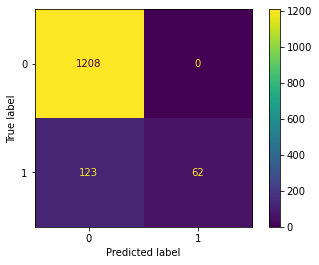

In [108]:
#create confution metrix
plot_confusion_matrix(knnClassifier, X_test, y_test)
plt.show()

In [109]:
#check accuracy of model and perfomance
print('Accuracy score: {}'.format(accuracy_score(y_test, Prediction_y)))
print('Precision score: {}'.format(precision_score(y_test, Prediction_y)))
print('Recall score: {}'.format(recall_score(y_test, Prediction_y)))
print('F1 score: {}'.format(f1_score(y_test, Prediction_y)))

Accuracy score: 0.9117013639626705
Precision score: 1.0
Recall score: 0.33513513513513515
F1 score: 0.5020242914979757


In [ ]:
#123 massages are labeled as spam but we are given as prediction those are not spam.
#we can improve perfomance in KNN model by rescaling features 
#use proper value for k value

In [ ]:
#IT18224412
#N.D.N.S. Abesingha
#Model : SVM Classifier

In [110]:
#Build SVM modelusing Train Data
svmClassifier=svm.SVC(kernel='linear',C=1.0)
svmClassifier.fit(X_train,y_train)

SVC(kernel='linear')

In [111]:
#predict value using test data
predictions = svmClassifier.predict(X_test)

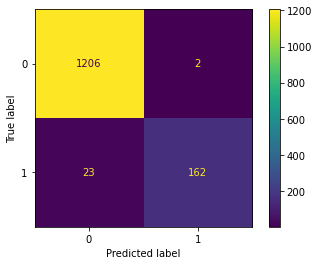

In [112]:
#create confution metrix
plot_confusion_matrix(svmClassifier, X_test, y_test)
plt.show()

In [113]:
#check accuracy of model and perfomance
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9820531227566404
Precision score: 0.9878048780487805
Recall score: 0.8756756756756757
F1 score: 0.9283667621776505


In [ ]:
#23 massages are labeled as spam but we are given as prediction those are not spam and 2 massages are labeled as ham but we are given as prediction those are spam.
#we can improve SVM accuracy by optimizing the hyper-parameters
#improve accuracy by resample data before training with the imblearn library
#Accuracy Value : 0.9820531227566404

In [114]:
#In here we can see accuracy of each models. We can select the best model by using accuracy of each models.
    #Accuracy score of Naive bayes: 0.9597989949748744
    #Accuracy score of K Nearest Neighbour: 0.9117013639626705
    #Accuracy score of Support Vector Machine: 0.9820531227566404
#In here SVM model get a maximum accuracy value. so we can get this SVM model as a best model